 # Web APIs

A growing number of organizations make data sets available on the web in a style called REST, which stands for REpresentational State Transfer. The details (and ideology) aren’t important; what matters is that when REST is used, every data set is identified by a URL and can be accessed through a set of functions called an application programming interface (API). 

**Topics Covered:**
- Web APIs
- Example for Web APIs
- Get data from different APIs:
    * [Web APIs](#Web APIs)
    * [Climate Data API](#Climate Data API)
    * [Twitter API](#twitterapi)
    * [NYtimes API](#NYtimes API)


    
### How Do GET Requests Work?  A Web Browsing Example

As you might suspect from the example above, surfing the web is basically equivalent to sending a bunch of GET requests to different servers and asking for different files written in HTML.

Suppose, for instance, I wanted to look something up on Wikipedia.  My first step would be to open my web browser and type in http://www.wikipedia.org.  Once I hit return, I'd see the page below.  


SyntaxError: invalid syntax (<ipython-input-9-cd6e386a459a>, line 5)

### Steps of getting data from Web APIs:
##### STEP 1: Finding Data Resources

Newspapers are an excellent source of such information. The frequency with which certain items appear in its pages can be a decent metric of its popularity, and its continual publication creates a built-in time series. 
##### STEP 2: Getting API Access
For most APIs, a key or other user credentials are required for any database querying. Generally, this requires that you register with the organization. Most APIs are set up for developers, so you'll likely be asked to register an "application". All this really entails is coming up with a name for your app/bot/project, and providing your real name, organization, and email. Note that some more popular APIs (e.g. Twitter, Facebook) will require additional information, such as a web address or mobile number.

Once you've successfully registered, you will be assigned one or more keys, tokens, or other credentials that must be supplied to the server as part of any API call you make. To make sure that users aren't abusing their data access privileges (e.g. by making many rapid queries), each set of keys will be given several rate limits governing the total number of calls that can be made over certain intervals of time. For the NYT Article API, we have relatively generous rate limits --- 10 calls per second and 10,000 calls per day.
##### STEP 3: Construct a GET Request
Likely the most challenging part of using web APIs is learning how to format your GET request URLs.  While there are common architectures for such URLs, each API has its own unique quirks.  For this reason, carefully reviewing the API documentation is critical.

Most GET request URLs for API querying have three or four components:

1. *Base URL*: a link stub that will be at the beginning of all calls to a given API; points the server to the location of an entire database

2. *Search Parameters*: a character string appended to a base URL that tells the server what to extract from the database; basically a series of filters used to point to specific parts of a database

3. *Authenication Key/Token*: a user-specific character string appended to a base URL telling the server who is making the query; allows servers to efficiently manage database access

4. *Response Format*: a character string indicating how the response should be formatted; usually one of .csv, .json, or .xml


##### STEP 4: Constructing API GET Requests in Python

Before we start, run this command:


In [2]:
pip install requests


The following command must be run outside of the IPython shell:

    $ pip install requests

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [ ]:
STEP 1: Finding Data Resources

To determine the popularity of something, we need a measurement of how frequently or widely it is referenced or encountered. Moreover, to determine how this popularity changes over time, we need a measurement that is taken repeatedly.

Newspapers are an excellent source of such information. The frequency with which certain items appear in its pages can be a decent metric of its popularity, and its continual publication creates a built-in time series. And while there are a variety of newspapers to choose from, we'll be working with the New York Times for a variety of reasons --- including its status as a paper of record, its long publishing history, and (most importantly) its convenient article API.

NYT Article API

### Climate Data API
For example, the World Bank’s Climate Data API provides data generated by 15 global circulation models. According to the API’s home page, the data sets containing yearly averages for various values are identified by URLs of the form:

http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/var/year/iso3.ext

where:

var is either pr (for precipitation) or tas (for “temperature at surface”);
iso3 is the International Standards Organization (ISO) 3-letter code for a country, such as “CAN” for Canada or “BRA” for Brazil; and
ext (short for “extension”) specifies the format we want the data in. There are several choices for format, but the simplest is comma-separated values (CSV), in which each record is a row, and the values in each row are separated by commas. (CSV is frequently used for spreadsheet data.)
For example, if we want the average annual temperature in Canada as a CSV file, the URL is:

http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv
If we paste that URL into a browser, it displays:
~~~
year,data
1901,-7.67241907119751
1902,-7.862711429595947
1903,-7.910782814025879
...
2007,-6.819293975830078
2008,-7.2008957862854
2009,-6.997011661529541
~~~

In [2]:

import requests
url = 'http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv'
response = requests.get(url)
if response.status_code != 200:
    print('Failed to get data:', response.status_code)
else:
    print('First 100 characters of data are')
    print(response.text[:100])

First 100 characters of data are
year,data
1901,-7.67241907119751
1902,-7.862711429595947
1903,-7.910782814025879
1904,-8.15572929382


This particular data set might be stored in a file on the World Bank’s server, or that server might:

1. Receive our URL.
2. Break it into pieces.
3. Extract the three key fields (the variable, the country code, and the desired format).
4. Fetch the desired data from a database.
5. Format the data as CSV.
6. Send that to our browser.

As long as the World Bank doesn’t change its URLs, we don’t need to know which method it’s using and it can switch back and forth between them without breaking our programs.

### Twitter API

This Twitter API is slightly more complicated, but because of this, people have created very useful tools to easily interact with the Twitter API. First, follow the directions to get your API credientials.

#### Question 1
Follow these instructions to get your keys:

1. [Create a Twitter account](https://twitter.com).  You can use an existing account if you have one.
2. Under account settings, add your phone number to the account.
3. [Create a Twitter developer account](https://dev.twitter.com/resources/signup).  Attach it to your Twitter account.
4. Once you're logged into your developer account, [create an application for this assignment](https://apps.twitter.com/app/new).  You can call it whatever you want, and you can write any URL when it asks for a web site.
5. On the page for that application, find your Consumer Key and Consumer Secret.
6. On the same page, create an Access Token.  Record the resulting Access Token and Access Token Secret.
7. Edit the file [keys.json](keys.json) and replace the placeholders with your keys.  Don't turn in that file.



2017-08-27 21:11:20


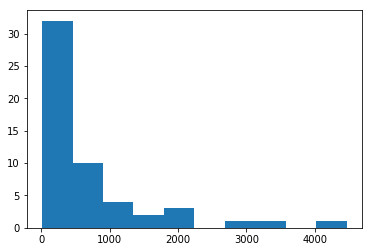

In [6]:
import tweepy
import numpy as np
import matplotlib.pyplot as plt

# Twitter API credentials
consumer_key = "IjI8AdEUOlzif3J0qgt6bw9JI"
consumer_secret = "gZLhygPv5uBCWIQVr6sZjCgYVfcXGzGuTNl7oOapYmWazdLEm6"
access_key = "278661116-qdUru3GXVYT9upGH0cgbwROu4KzypMSwQgknMNW2"
access_secret = "RMZY9H7vvbuHq9jFZO4fdtw5cBPZUlbLDhEwU9zir6LyG"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

# search all twitter
# search all twitter
results = tweepy.Cursor(
    api.search,
    q='Berkeley', # query, any word you want found in a tweet
  #  geocode="37.871853,-122.258423,80km", # lat. and long., radius
    result_type = 'popular'
    ).items(100)

results_tweets = []

for t in results:
    results_tweets.append(t)
    
    
print(results_tweets[0].created_at)
retweet_counts = []
for t in results_tweets:
    retweet_counts.append(t.retweet_count)

results_tweets = []
for t in results:
    results_tweets.append(t)
    
plt.hist(retweet_counts)
plt.show()





### NYTimes API

How Much Less Popular is Duke Ellington?

If you ask a jazz musician who they feel is the greatest bandleader of all time, there's a pretty good chance they'll mention Duke Ellington. Though Ellington was at peak popularity from roughly 1930 to 1945, his music is still heard regularly.

TASK: Characterize the popularity of Duke Ellington over the past 15 years. Specifically, is he "trending"?



In [3]:
# Import required libraries
import requests
import json
from __future__ import division
import math
import csv
import matplotlib.pyplot as plt

# set key
key="be8992a420bfd16cf65e8757f77a5403:8:44644296"

# set base url
base_url="http://api.nytimes.com/svc/search/v2/articlesearch"

# set response format
response_format=".json"

# set search parameters
search_params = {"q":"Duke Ellington",
                 "api-key":key}   
r = requests.get(base_url+response_format, params=search_params)
#print(r.url)

# Inspect the content of the response, parsing the result as text
response_text= r.text
#print(response_text[:1000])

# Convert JSON response to a dictionary
data = json.loads(response_text)
# data

#Commands to work with json data
data['status']
type(data['response']['docs'])
data['response']['meta']['hits']
data['response'].keys()


#put the data in variable.
docs = data['response']['docs']
docs[0]

{'_id': '591587cc7c459f24986df31e',
 'blog': {},
 'byline': {'original': 'By LAURA M. HOLSON'},
 'document_type': 'article',
 'headline': {'kicker': 'Vows',
  'main': 'In the Theater, an Unexpected Match for a Reluctant Bride',
  'print_headline': 'An Unexpected Match for a Reluctant Bride'},
 'keywords': [{'isMajor': 'N',
   'name': 'subject',
   'rank': 1,
   'value': 'Dating and Relationships'},
  {'isMajor': 'N',
   'name': 'subject',
   'rank': 2,
   'value': 'Weddings and Engagements'},
  {'isMajor': 'N', 'name': 'subject', 'rank': 3, 'value': 'Theater'},
  {'isMajor': 'N',
   'name': 'organizations',
   'rank': 4,
   'value': 'La Jolla Playhouse'},
  {'isMajor': 'N', 'name': 'persons', 'rank': 5, 'value': 'Wong, B D'},
  {'isMajor': 'N',
   'name': 'creative_works',
   'rank': 6,
   'value': 'Come From Away (Play)'},
  {'isMajor': 'N',
   'name': 'creative_works',
   'rank': 7,
   'value': 'The Glass Menagerie (Play)'}],
 'multimedia': [{'height': 75,
   'legacy': {'thumbnail': 

In [4]:
def get_api_data(term, year):
    # set base url
    base_url="http://api.nytimes.com/svc/search/v2/articlesearch"

    # set response format
    response_format=".json"

    # set search parameters
    search_params = {"q":term,
                 "api-key":key,
                 "begin_date": str(year) + "0101", # date must be in YYYYMMDD format
                 "end_date":str(year) + "1231"}

    # make request
    r = requests.get(base_url+response_format, params=search_params)
    
    # convert to a dictionary
    data=json.loads(r.text)
    
    # get number of hits
    hits = data['response']['meta']['hits']
    print("number of hits:", str(hits))
    
    # get number of pages
    pages = int(math.ceil(hits/10))
    
    # make an empty list where we'll hold all of our docs for every page
    all_docs = [] 
    
    # now we're ready to loop through the pages
    for i in range(pages):
        print("collecting page", str(i))
        
        # set the page parameter
        search_params['page'] = i
        
        # make request
        r = requests.get(base_url+response_format, params=search_params)
    
        # get text and convert to a dictionary
        data=json.loads(r.text)
        
        # get just the docs
        docs = data['response']['docs']
        
        # add those docs to the big list
        all_docs = all_docs + docs
        
        time.sleep(randint(3,5))  # pause between calls
        
    return(all_docs)

In [5]:
get_api_data("Duke Ellington", 2014)

number of hits: 170
collecting page 0


KeyError: 'response'